# 선형 회귀

## 데이터 준비


In [1]:
from sklearn.datasets import load_diabetes # C

In [2]:
diabetes = load_diabetes() # {data : target}의 형태로 된 딕셔너리

In [3]:
print(diabetes.data.shape, diabetes.target.shape) # (442, 10) : 442개의 sample이 10개의 속성을 지님

(442, 10) (442,)


In [4]:
import matplotlib.pyplot as plt

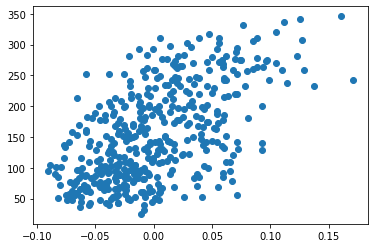

In [5]:
plt.scatter(diabetes.data[:, 2], diabetes.target) # row, column

In [6]:
l1 = ['gd', 'iu', '나얼']
print(l1)

['gd', 'iu', '나얼']


In [7]:
l1[:]

['gd', 'iu', '나얼']

In [8]:
l1[0:2]


['gd', 'iu']

In [9]:
l1[1:]

['iu', '나얼']

In [10]:
X = diabetes.data[:, 2]
y = diabetes.target

In [11]:
print(X)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

# 경사하강법

- 적합한 기울기 및 절편을 찾는 것이 회귀 알고리즘의 목표
- 경사하강법
  - 기울기(변화율)을 사용해서 모델(수식)을 조금씩 조정하는 최적화 알고리즘

- y = ax + b : 결과 값
- y_hat = wx + b : 예측 값

target 데이터를 뜻하는 y와 구별하기 위해서 y_hat 사용

1. 무작위로 {w, b}를 선택
2. x에서 샘플 하나를 선택해서 y_hat을 계산
3. y_hat과 샘플의 y를 비교
4. y_hat과 y가 더 가까워지도록 w, b를 조절
5. 모든 샘플에 적용

In [12]:
# 1. 무작위로 {w, b}
w = 1.0
b = 1.0

In [13]:
# 2. X에서 샘플 가지고와서 y_hat을 계산
y_hat = X[0] * w + b
print(y_hat)

1.0616962065186886


In [14]:
# 3. y와 y_hat을 비교
print(y[0] - y_hat)

149.9383037934813


In [15]:
# 4. y_hat과 y가 더 가까워지도록 w, b를 조절
w_inc = w + 0.1
y_hat_inc = X[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [16]:
# 5. 모든 샘플에 적용
w_rate = (y_hat_inc - y_hat) / (w_inc - w) # 기울기. 
w_new = w + w_rate

In [17]:
b_inc = b + 0.1
y_hat_inc = X[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [19]:
# 5-2 b에도 마찬가지로 적용
b_rate = (y_hat_inc - y_hat) - (b_inc - b)
b_new = b + b_inc

- 문제점 : 
  - y_hat이 y에 한참 미치지 못하는 경우 0.1. 이런 식으로 더해주면 한참 걸림. w, b를 더 큰 폭으로 수정할 수 없음. -> local minima에 빠질 수 있다.
  - y_hat이 y보다 커지면 y_hat을 감소시키지 못함. +0.1만 했기 때문에

-> Backpropagation으로 이를 해결

## 오차역전파(Backpropagation)

- 컴퓨터로 미분 가능한가? 불연속한 값을 다루기 때문에 불가능하다고 볼 수 있다.

- y_hat과 y의 값 차이가 심할 경우 {w, b}를 결정하기 쉽지 않다.
  - y_hat과 y를 이용해서 w, b를 업데이트하는 방법이 필요하는데. y_hat이 y의 오차를 전달하는 방법으로 이를 해결한다.

err = y[0] - y_hat
- **경사 하강법**만으로는 w, b를 조정하기 어려웠는데 **오차 역전파(오차)**를 이용해서 w, b를 빠르게 조정할 수 있다.

w_new = w + w_rate * err

b_new = b + 1 * err


- 오차 역전파 사용

In [20]:
err = y[0] - y_hat
w_new = w + w_rate
b_new = b + 1  *err
print(w_new, b_new)

1.0616962065186888 150.9383037934813


In [24]:
y_hat = X[1] * w_new + b_new
err = y[1] - y_hat
w_rate = X[1]
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

-6.728119323624628 151.13618777370587


손실 함수(Loss Function)
- 경사 하강법이란 '손실 함수'가 정의되었을 때 손실 함수의 값이 **최소**가 되는 지점을 찾는 방법
# 결론 : 경사하강법 = 손실함수를 최소로 만드는 것 = y(결과값) - y_hat(예측값)[지도학습]

